# Prediction Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from prediction import RULPrediction, mean_penalty_scoring, rmse
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, LSTM
from keras.optimizers import Adam, RMSprop
from keras.callbacks import LearningRateScheduler
from keras import backend as K

Using TensorFlow backend.


In [2]:
rul_ceil_set = 125
data_train = 'PT/DataTrain.txt'
data_schedule = 'PT/DataSchedule.txt'

# Random Forest

In [3]:
rul_prediction = RULPrediction(n_backtrack=5, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)
X_train, y_train = rul_prediction.train_df[rul_prediction.col_names].values, rul_prediction.train_df['RUL'].values.ravel()
X_val, y_val = rul_prediction.val_df[rul_prediction.col_names].values, rul_prediction.val_df['RUL'].values.ravel()

param_dist = {
    'max_depth': [10, 15, 20, None],
    'max_features': [0.25, 0.5, 0.75, 'auto'],
    'n_estimators': [100, 200]
}

param_grid = ParameterGrid(param_dist)
result = []
for params in param_grid:
    print('[INFO] Running params: ' + str(params))
    rf = RandomForestRegressor(**params)
    y_pred = rf.fit(X_train, y_train).predict(X_val)
    result.append({
        **params,
        'r2': r2_score(y_val, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
        's': mean_penalty_scoring(y_val, y_pred)
    })
    
pd.DataFrame(result)

[INFO] Prepare dataset for engine prediction
[INFO] Running params: {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 100}
[INFO] Running params: {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 200}
[INFO] Running params: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 100}
[INFO] Running params: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200}
[INFO] Running params: {'max_depth': 10, 'max_features': 0.75, 'n_estimators': 100}
[INFO] Running params: {'max_depth': 10, 'max_features': 0.75, 'n_estimators': 200}
[INFO] Running params: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
[INFO] Running params: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
[INFO] Running params: {'max_depth': 15, 'max_features': 0.25, 'n_estimators': 100}
[INFO] Running params: {'max_depth': 15, 'max_features': 0.25, 'n_estimators': 200}
[INFO] Running params: {'max_depth': 15, 'max_features': 0.5, 'n_estimators': 100}
[INFO] Running params: {'max_d

,max_depth,max_features,n_estimators,r2,rmse,s
0,10.0,0.25,100,0.818183,17.695695,11.522118
1,10.0,0.25,200,0.819820,17.615840,11.328479
2,10.0,0.5,100,0.818767,17.667251,11.555568
3,10.0,0.5,200,0.819018,17.655036,11.452805
4,10.0,0.75,100,0.818733,17.668937,11.645050
5,10.0,0.75,200,0.818747,17.668231,11.662887
6,10.0,auto,100,0.818862,17.662649,11.571137
7,10.0,auto,200,0.818196,17.695069,11.661952
8,15.0,0.25,100,0.822324,17.493025,11.011334
9,15.0,0.25,200,0.823927,17.413961,10.849997


In [4]:
param_dist = {
    'max_depth': [None],
    'max_features': [0.25],
    'n_estimators': [200, 400, 600, 800, 1000]
}

param_grid = ParameterGrid(param_dist)
result = []
for params in param_grid:
    print('[INFO] Running params: ' + str(params))
    rf = RandomForestRegressor(**params)
    y_pred = rf.fit(X_train, y_train).predict(X_val)
    result.append({
        **params,
        'r2': r2_score(y_val, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
        's': mean_penalty_scoring(y_val, y_pred)
    })
    
pd.DataFrame(result)

[INFO] Running params: {'max_depth': None, 'max_features': 0.25, 'n_estimators': 200}
[INFO] Running params: {'max_depth': None, 'max_features': 0.25, 'n_estimators': 400}
[INFO] Running params: {'max_depth': None, 'max_features': 0.25, 'n_estimators': 600}
[INFO] Running params: {'max_depth': None, 'max_features': 0.25, 'n_estimators': 800}
[INFO] Running params: {'max_depth': None, 'max_features': 0.25, 'n_estimators': 1000}


,max_depth,max_features,n_estimators,r2,rmse,s
0,None,0.25,200,0.824084,17.406169,10.498905
1,None,0.25,400,0.824084,17.406191,10.280643
2,None,0.25,600,0.824765,17.372460,10.221816
3,None,0.25,800,0.825225,17.349645,10.298077
4,None,0.25,1000,0.825322,17.344800,10.255008


# CNN

In [5]:
n_backtrack = 30
rul_prediction = RULPrediction(n_backtrack=n_backtrack, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)
X_shape = (-1, n_backtrack+1, len(rul_prediction.sensors)+len(rul_prediction.settings), 1)
X_train = rul_prediction.train_df[rul_prediction.col_names].values.reshape(X_shape)
y_train = rul_prediction.train_df['RUL'].values
X_val = rul_prediction.val_df[rul_prediction.col_names].values.reshape(X_shape)
y_val = rul_prediction.val_df['RUL'].values

batch_size = 64
lr = 0.001
decay_rate = 1e-3

dcnn = Sequential()
dcnn.add(Conv2D(10, kernel_size=(3, 1), padding='same', activation='tanh', input_shape=X_shape[1:], name='conv1'))
dcnn.add(Conv2D(10, kernel_size=(3, 1), padding='same', activation='tanh', name='conv2'))
dcnn.add(Conv2D(10, kernel_size=(3, 1), padding='same', activation='tanh', name='conv3'))
dcnn.add(Conv2D(10, kernel_size=(3, 1), padding='same', activation='tanh', name='conv4'))
dcnn.add(Flatten(name='flat'))
dcnn.add(Dropout(0.5, name='drop1'))
dcnn.add(Dense(100, activation='tanh', name='fc1'))
dcnn.add(Dropout(0.25, name='drop2'))
dcnn.add(Dense(1, activation='linear', name='out'))
opt = Adam(lr=lr, decay=decay_rate)
dcnn.compile(loss='mse', optimizer=opt, metrics=[rmse])

history = dcnn.fit(X_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=[X_val, y_val])

[INFO] Prepare dataset for engine prediction
Train on 11052 samples, validate on 3231 samples
Epoch 1/50
11052/11052 [==============================] - 12s 1ms/step - loss: 5707.6844 - rmse: 75.3211 - val_loss: 4103.3539 - val_rmse: 58.9745
Epoch 2/50
11052/11052 [==============================] - 11s 981us/step - loss: 4075.1097 - rmse: 63.6682 - val_loss: 2975.7947 - val_rmse: 49.2476
Epoch 3/50
11052/11052 [==============================] - 10s 909us/step - loss: 3040.0886 - rmse: 54.9863 - val_loss: 2229.1694 - val_rmse: 41.9357
Epoch 4/50
11052/11052 [==============================] - 10s 945us/step - loss: 2340.0718 - rmse: 48.2648 - val_loss: 1715.9405 - val_rmse: 36.3464
Epoch 5/50
11052/11052 [==============================] - 11s 1ms/step - loss: 1834.1088 - rmse: 42.7172 - val_loss: 1352.5973 - val_rmse: 32.1704
Epoch 6/50
11052/11052 [==============================] - 11s 961us/step - loss: 1470.6618 - rmse: 38.2542 - val_loss: 1088.9343 - val_rmse: 28.9773
Epoch 7/50
11052

In [6]:
y_pred = dcnn.predict(X_val).ravel()
result_dcnn = []
result_dcnn.append({
        'r2': r2_score(y_val, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
        's': mean_penalty_scoring(y_val, y_pred)
    })
pd.DataFrame(result_dcnn)

,r2,rmse,s
0,0.883828,14.027166,4.024146


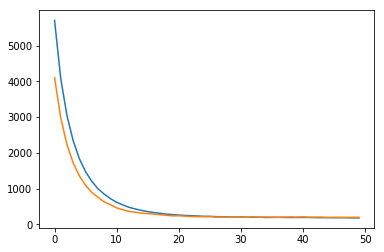

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# LSTM

In [8]:
n_backtrack = 30
rul_prediction = RULPrediction(n_backtrack=n_backtrack, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)
rul_prediction.train_df
X_shape = (-1, n_backtrack+1, len(rul_prediction.sensors)+len(rul_prediction.settings))
X_train = rul_prediction.train_df[rul_prediction.col_names].values.reshape(X_shape)
y_train = rul_prediction.train_df['RUL'].values
X_val = rul_prediction.val_df[rul_prediction.col_names].values.reshape(X_shape)
y_val = rul_prediction.val_df['RUL'].values

batch_size = 1
lr = 0.001
decay_rate = 1e-3
lstm = Sequential()
lstm.add(LSTM(n_backtrack+1, return_sequences=True, input_shape=X_shape[1:], name='lstm1'))
lstm.add(LSTM(2*(n_backtrack+1), name='lstm2'))
lstm.add(Dropout(0.1, name='drop'))
lstm.add(Dense(8, activation='linear', name='fc1'))
lstm.add(Dense(8, activation='linear', name='fc2'))
lstm.add(Dense(1, activation='linear', name='out'))
opt = RMSprop(lr=lr, decay=decay_rate)
lstm.compile(loss='mse', optimizer=opt, metrics=[rmse])
history = lstm.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=[X_val, y_val])

[INFO] Prepare dataset for engine prediction
Train on 11052 samples, validate on 3231 samples
Epoch 1/3
11052/11052 [==============================] - 661s 60ms/step - loss: 487.6564 - rmse: 16.5775 - val_loss: 301.7546 - val_rmse: 12.7404
Epoch 2/3
11052/11052 [==============================] - 660s 60ms/step - loss: 258.9260 - rmse: 12.0166 - val_loss: 241.0090 - val_rmse: 11.4350
Epoch 3/3
11052/11052 [==============================] - 666s 60ms/step - loss: 215.4028 - rmse: 10.8223 - val_loss: 226.5360 - val_rmse: 10.7948


In [9]:
y_pred = lstm.predict(X_val).ravel()
result_lstm = []
result_lstm.append({
        'r2': r2_score(y_val, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
        's': mean_penalty_scoring(y_val, y_pred)
    })
pd.DataFrame(result_lstm)

,r2,rmse,s
0,0.866248,15.051113,4.907776


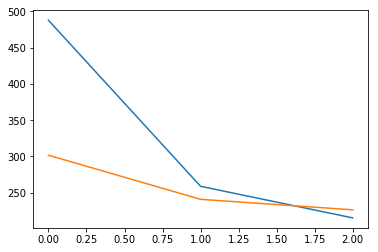

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Pick the best model based on Test Set performance

In [11]:
result_test = []

In [12]:
rul_prediction = RULPrediction(n_backtrack=5, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)
X_train, y_train = rul_prediction.train_df[rul_prediction.col_names].values, rul_prediction.train_df['RUL'].values.ravel()
X_test, y_test = rul_prediction.test_df[rul_prediction.col_names].values, rul_prediction.test_df['RUL'].values.ravel()

best_rf = RandomForestRegressor(
    max_depth = None,
    max_features = 0.25,
    n_estimators = 600
)

y_pred = best_rf.fit(X_train, y_train).predict(X_test)
result_test.append({
    'model': 'Random Forest',
    'r2': r2_score(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
    's': mean_penalty_scoring(y_test, y_pred)
})

[INFO] Prepare dataset for engine prediction


In [13]:
n_backtrack=30
rul_prediction = RULPrediction(n_backtrack=n_backtrack, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)

X_shape = (-1, n_backtrack+1, len(rul_prediction.sensors)+len(rul_prediction.settings), 1)
X_test = rul_prediction.test_df[rul_prediction.col_names].values.reshape(X_shape)
y_test = rul_prediction.test_df['RUL'].values

y_pred = dcnn.predict(X_test).ravel()
result_test.append({
    'model': 'DCNN',
    'r2': r2_score(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
    's': mean_penalty_scoring(y_test, y_pred)
})

[INFO] Prepare dataset for engine prediction


In [14]:
n_backtrack = 30
rul_prediction = RULPrediction(n_backtrack=n_backtrack, rul_ceil=rul_ceil_set)
print("[INFO] Prepare dataset for engine prediction")
is_prepared = rul_prediction.prepare(data_train)
rul_prediction.train_df
X_shape = (-1, n_backtrack+1, len(rul_prediction.sensors)+len(rul_prediction.settings))
X_test = rul_prediction.test_df[rul_prediction.col_names].values.reshape(X_shape)
y_test = rul_prediction.test_df['RUL'].values

y_pred = lstm.predict(X_test).ravel()
result_test.append({
    'model': 'LSTM',
    'r2': r2_score(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
    's': mean_penalty_scoring(y_test, y_pred)
})

[INFO] Prepare dataset for engine prediction


In [15]:
pd.DataFrame(result_test)

,model,r2,rmse,s
0,Random Forest,0.799901,18.555954,19.027274
1,DCNN,0.866255,15.078604,5.468461
2,LSTM,0.837597,16.615685,7.700256


In [16]:
n_backtrack = 30
rul_prediction = RULPrediction(n_backtrack=n_backtrack, rul_ceil=rul_ceil_set)
is_prepared = rul_prediction.prepare(data_train)
all_df, scaler = rul_prediction.get_all_data_train()
X_shape = (-1, n_backtrack+1, len(rul_prediction.sensors)+len(rul_prediction.settings), 1)
X_all = all_df[rul_prediction.col_names].values.reshape(X_shape)
y_all = all_df['RUL'].values

# Additional epochs with the whole dataset
batch_size = 64
history = dcnn.fit(X_all, y_all, batch_size=batch_size, epochs=10, verbose=1)

Epoch 1/10
17631/17631 [==============================] - 15s 828us/step - loss: 218.7959 - rmse: 14.6968
Epoch 2/10
17631/17631 [==============================] - 17s 949us/step - loss: 210.4191 - rmse: 14.4285
Epoch 3/10
17631/17631 [==============================] - 19s 1ms/step - loss: 210.8855 - rmse: 14.4365
Epoch 4/10
17631/17631 [==============================] - 15s 860us/step - loss: 207.4944 - rmse: 14.3257
Epoch 5/10
17631/17631 [==============================] - 15s 843us/step - loss: 209.5550 - rmse: 14.3796
Epoch 6/10
17631/17631 [==============================] - 14s 810us/step - loss: 205.7847 - rmse: 14.2653
Epoch 7/10
17631/17631 [==============================] - 15s 842us/step - loss: 201.5849 - rmse: 14.1255
Epoch 8/10
17631/17631 [==============================] - 15s 843us/step - loss: 202.5081 - rmse: 14.1558
Epoch 9/10
17631/17631 [==============================] - 16s 932us/step - loss: 203.4338 - rmse: 14.1769
Epoch 10/10
17631/17631 [=======================

In [18]:
schedule_df = rul_prediction.prepare_file(data_schedule, scaler)
X_schedule = schedule_df[rul_prediction.col_names].values.reshape(X_shape)
pred = dcnn.predict(X_schedule).ravel()

schedule_df['pred'] = np.floor(pred).astype(int)
schedule_df[['engine_id', 'cycle', 'pred']].head()
last_cycle = schedule_df[['engine_id', 'cycle']].groupby('engine_id').max().rename(columns={'cycle':'max_cycle'}).reset_index()
schedule_max_df = schedule_df.merge(last_cycle, how='left', on=['engine_id'])
schedule_pred_df = schedule_max_df[schedule_max_df['cycle'] == schedule_max_df['max_cycle']][['engine_id', 'pred']].rename(columns={'engine_id':'id', 'pred':'RUL'}).sort_values('id')
schedule_pred_df.to_excel('PT/RUL_predictions.xlsx', index=False)